# **Welcome To the Notebook**


### **Task 1 - Loading our data**

Installing the pyspark using pip

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=bc5e4ae43fc711a233461de3538bda5976ef3fbc09d7e13c7aea763c912885ce
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


Importing Modules

In [ ]:
# importing spark session
from pyspark.sql import SparkSession

# data visualization modules
import matplotlib.pyplot as plt
import plotly.express as px

# pandas module
import pandas as pd

# pyspark SQL functions
from pyspark.sql.functions import col, when, count, udf

# pyspark data preprocessing modules
from pyspark.ml.feature import Imputer, StringIndexer, VectorAssembler, StandardScaler, OneHotEncoder

# pyspark data modeling and model evaluation modules
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator


Building our Spark Session

In [ ]:
spark = SparkSession.builder.appName("Customer_Churn_Prediction").getOrCreate()
spark

Loading our data

In [ ]:
data = spark.read.csv("dataset.csv", inferSchema=True, header=True)

Print the data schema to check out the data types

In [ ]:
data.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: string (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



Get the data dimension

In [ ]:
print(f"shape{data.count(), len(data.columns)}")

shape(7043, 21)


### **Task 2 - Exploratory Data Analysis**
- Distribution Analysis
- Correlation Analysis
- Univariate Analysis
- Finding Missing values

Let's define some lists to store different column names with different data types.

In [ ]:
numerical_columns = [name for name, typ in data.dtypes if typ == "int" or typ == "double"]
categorical_columns = [name for name, typ in data.dtypes if typ == "string"]

Let's get all the numerical features and store them into a pandas dataframe.

In [ ]:
df = data.select(numerical_columns).toPandas()

Let's create histograms to analyse the distribution of our numerical columns.

<ipython-input-12-42fb3c2ae69d>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins=20)


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

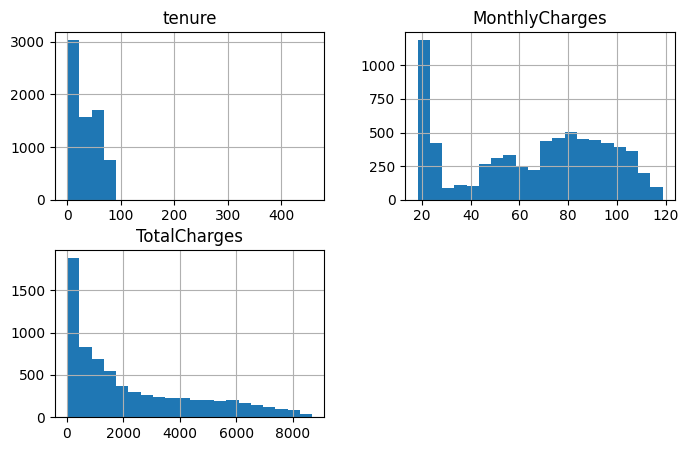

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
df.hist(ax=ax, bins=20)

Let's generate the correlation matrix

In [ ]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.243703,0.806530
MonthlyCharges,0.243703,1.000000,0.651065
TotalCharges,0.806530,0.651065,1.000000


Let's check the unique value count per each categorical variables

In [ ]:
for column in categorical_columns:
  data.groupby(column).count().show()

+----------+-----+
|customerID|count|
+----------+-----+
|3668-QPYBK|    1|
|6234-RAAPL|    1|
|1894-IGFSG|    1|
|6982-SSHFK|    1|
|5859-HZYLF|    1|
|6479-OAUSD|    1|
|2592-YKDIF|    1|
|6718-BDGHG|    1|
|3195-TQDZX|    1|
|4248-QPAVC|    1|
|5668-MEISB|    1|
|5802-ADBRC|    1|
|2712-SYWAY|    1|
|2011-TRQYE|    1|
|7244-KXYZN|    1|
|0953-LGOVU|    1|
|3623-FQBOX|    1|
|3692-JHONH|    1|
|3528-HFRIQ|    1|
|7661-CPURM|    1|
+----------+-----+
only showing top 20 rows

+------+-----+
|gender|count|
+------+-----+
|Female| 3488|
|  Male| 3555|
+------+-----+

+-------------+-----+
|SeniorCitizen|count|
+-------------+-----+
|           No| 5901|
|          Yes| 1142|
+-------------+-----+

+-------+-----+
|Partner|count|
+-------+-----+
|     No| 3641|
|    Yes| 3402|
+-------+-----+

+----------+-----+
|Dependents|count|
+----------+-----+
|        No| 4933|
|       Yes| 2110|
+----------+-----+

+------------+-----+
|PhoneService|count|
+------------+-----+
|          No|  682

Let's find number of null values in all of our dataframe columns

In [ ]:
for column in data.columns:
  data.select(count(when(col(column).isNull(), column)).alias(column)).show()

+----------+
|customerID|
+----------+
|         0|
+----------+

+------+
|gender|
+------+
|     0|
+------+

+-------------+
|SeniorCitizen|
+-------------+
|            0|
+-------------+

+-------+
|Partner|
+-------+
|      0|
+-------+

+----------+
|Dependents|
+----------+
|         0|
+----------+

+------+
|tenure|
+------+
|     0|
+------+

+------------+
|PhoneService|
+------------+
|           0|
+------------+

+-------------+
|MultipleLines|
+-------------+
|            0|
+-------------+

+---------------+
|InternetService|
+---------------+
|              0|
+---------------+

+--------------+
|OnlineSecurity|
+--------------+
|             0|
+--------------+

+------------+
|OnlineBackup|
+------------+
|           0|
+------------+

+----------------+
|DeviceProtection|
+----------------+
|               0|
+----------------+

+-----------+
|TechSupport|
+-----------+
|          0|
+-----------+

+-----------+
|StreamingTV|
+-----------+
|          0|
+----------

### **Task 3 - Data Preprocessing**
- Handling the missing values
- Removing the outliers

**Handling the missing values** <br>
Let's create a list of column names with missing values

In [ ]:
column_with_null_values = ["TotalCharges"]

Creating our Imputer

In [ ]:
imputer = Imputer(inputCols=column_with_null_values, outputCols=column_with_null_values).setStrategy("mean")

Use Imputer to fill the missing values

In [ ]:
imputer = imputer.fit(data)
data = imputer.transform(data)

Let's check the missing value counts again

In [ ]:
for column in column_with_null_values:
  data.select(count(when(col(column).isNull(), column)).alias(column)).show()

+------------+
|TotalCharges|
+------------+
|           0|
+------------+



**Removing the outliers** <br>
Let's find the customer with the tenure higher than 100

In [ ]:
data.select("CustomerID").where("Tenure > 100").show()

+----------+
|CustomerID|
+----------+
|5122-CYFXA|
+----------+



Let's drop the outlier row

In [ ]:
data = data.filter(data.tenure < 100)
data.count()

7042

### **Task 4 - Feature Preparation**
- Numerical Features
    - Vector Assembling
    - Numerical Scaling
- Categorical Features
    - String Indexing
    - Vector Assembling

- Combining the numerical and categorical feature vectors




**Feature Preparation - Numerical Features** <br>

`Vector Assembling --> Standard Scaling` <br>

**Vector Assembling** <br>
To apply our machine learning model we need to combine all of our numerical and categorical features into vectors. For now let's create a feature vector for our numerical columns.


In [ ]:
numerical_assembler = VectorAssembler(inputCols=numerical_columns, outputCol="numerical_features")
data = numerical_assembler.transform(data)

**Numerical Scaling** <br>
Let's standardize all of our numerical features.

In [ ]:
numerical_scaler = StandardScaler(inputCol="numerical_features",
                                  outputCol="numerical_features_scaled",
                                  withMean=True, withStd=True)

data = numerical_scaler.fit(data).transform(data)

**Feature Preperation - Categorical Features** <br>

`String Indexing --> Vector Assembling` <br>

**String Indexing** <br>
We need to convert all the string columns to numeric columns.

In [ ]:
categorical_columns_indexed = [name + "_indexed" for name in categorical_columns]
indexer = StringIndexer(inputCols=categorical_columns, outputCols=categorical_columns_indexed)
data = indexer.fit(data).transform(data)

data.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+-------------------+-------------------------+------------------+--------------+---------------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+-------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn| numerical_features|numerical_

Let's combine all of our categorifal features in to one feature vector.

In [ ]:
categorical_columns_indexed.remove("customerID_indexed")
categorical_columns_indexed.remove("Churn_indexed")

categorical_assembler = VectorAssembler(inputCols=categorical_columns_indexed, outputCol="categorical_features")
data = categorical_assembler.transform(data)

Now let's combine categorical and numerical feature vectors.

In [ ]:
assembler = VectorAssembler(inputCols=["numerical_features_scaled", "categorical_features"], outputCol="features")
data = assembler.transform(data)

In [ ]:
data.select("features", "Churn_indexed").show(5)

+--------------------+-------------+
|            features|Churn_indexed|
+--------------------+-------------+
|(19,[0,1,2,3,5,7,...|          0.0|
|(19,[0,1,2,9,10,1...|          0.0|
|(19,[0,1,2,9,10,1...|          1.0|
|[0.51406079695460...|          0.0|
|(19,[0,1,2,3],[-1...|          1.0|
+--------------------+-------------+
only showing top 5 rows



### **Task 5 - Model Training**
- Train and Test data splitting
- Creating our model
- Training our model
- Make initial predictions using our model

In this task, we are going to start training our model

In [ ]:
train, test = data.randomSplit([0.7, 0.3], seed=100)

Now let's create and train our desicion tree

In [ ]:
dt = DecisionTreeClassifier(featuresCol="features", labelCol="Churn_indexed", maxDepth=6)
model = dt.fit(train)

Let's make predictions on our test data

In [ ]:
predictions = model.transform(test)

### **Task 6 - Model Evaluation**
- Calculating area under the ROC curve for the `test` set
- Calculating area under the ROC curve for the `training` set
- Hyper parameter tuning

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="Churn_indexed")
evaluator.evaluate(predictions, params={evaluator.metricName: "areaUnderROC"})

0.7968193482241807

Let's get the AUC for our `training` set

In [ ]:
predictions_train = model.transform(train)
evaluator.evaluate(predictions_train, {evaluator.metricName: "areaUnderROC"})

0.7976224624061719

**Hyper parameter tuning**

Let's find the best `maxDepth` parameter for our DT model.

In [ ]:
def evaluate_dt(mode_params):
      test_accuracies = []
      train_accuracies = []

      for maxD in mode_params:
        # train the model based on the maxD
        decision_tree = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Churn_indexed', maxDepth = maxD)
        dtModel = decision_tree.fit(train)

        # calculating test error
        predictions_test = dtModel.transform(test)
        evaluator = BinaryClassificationEvaluator(labelCol="Churn_indexed")
        auc_test = evaluator.evaluate(predictions_test, {evaluator.metricName: "areaUnderROC"})
        # recording the accuracy
        test_accuracies.append(auc_test)

        # calculating training error
        predictions_training = dtModel.transform(train)
        evaluator = BinaryClassificationEvaluator(labelCol="Churn_indexed")
        auc_training = evaluator.evaluate(predictions_training, {evaluator.metricName: "areaUnderROC"})
        train_accuracies.append(auc_training)

      return(test_accuracies, train_accuracies)

Let's define `params` list to evaluate our model iteratively with differe maxDepth parameter.  

In [ ]:
maxDepths = [i for i in range(2, 21)]
text_accs, train_accs = evaluate_dt(maxDepths)

Let's visualize our results

In [ ]:
df = pd.DataFrame()
df["maxDepths"] = maxDepths
df["trainAccs"] = train_accs
df["testAccs"] = text_accs

px.line(df, x="maxDepths", y=["trainAccs", "testAccs"])

### **7 - Model Deployment**
- Giving Recommendations using our model



We were asked to recommend a solution to reduce the customer churn.


In [ ]:
imp_features = model.featureImportances
scores = [score for score in imp_features]

df = pd.DataFrame({"scores": scores}, index=numerical_columns + categorical_columns_indexed)
px.bar(df)

Let's create a bar chart to visualize the customer churn per contract type

In [ ]:
df = data.toPandas()

The bar chart displays the number of churned customers based on their contract type. It is evident that customers with a "Month-to-month" contract have a higher churn rate compared to those with "One year" or "Two year" contracts. As a recommendation, the telecommunication company could consider offering incentives or discounts to encourage customers with month-to-month contracts to switch to longer-term contracts.

In [ ]:
df[["tenure", "InternetService", "Contract"]]

,tenure,InternetService,Contract
0,1,DSL,Month-to-month
1,34,DSL,One year
2,2,DSL,Month-to-month
3,45,DSL,One year
4,2,Fiber optic,Month-to-month
...,...,...,...
7037,24,DSL,One year
7038,72,Fiber optic,One year
7039,11,DSL,Month-to-month
7040,4,Fiber optic,Month-to-month
